<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos_2021/blob/main/Mod_02_CLASS_02_NonLinear_Equation_brute_force_abril_13_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


<p>Métodos da força bruta</p>

$f(x)\approx \frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}(x-x_i) + f(x_i)
= \frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i) + y_i$

$x = x_i - \frac{x_{i+1}-x_i}{y_{i+1}-y_i}y_i\thinspace$



In [ ]:
def brute_force_optimizer(f, a, b, n):
    from numpy import linspace
    x = linspace(a, b, n)
    y=np.zeros(n)
    minimum_y=1e99
    minimum_x=1e99
    
    for i in range(n):
      y[i] = f(x[i])
      if(abs(y[i])<minimum_y):
        minimum_y=abs(y[i].copy())
        minimum_x=x[i].copy()

    # Return x and y values
    return minimum_x,minimum_y
 

In [ ]:
def f(x):
  fun=x**2-9.0
  return fun
soln = brute_force_optimizer(f,0, 4, 1001)  

print(soln)

(3.0, 0.0)


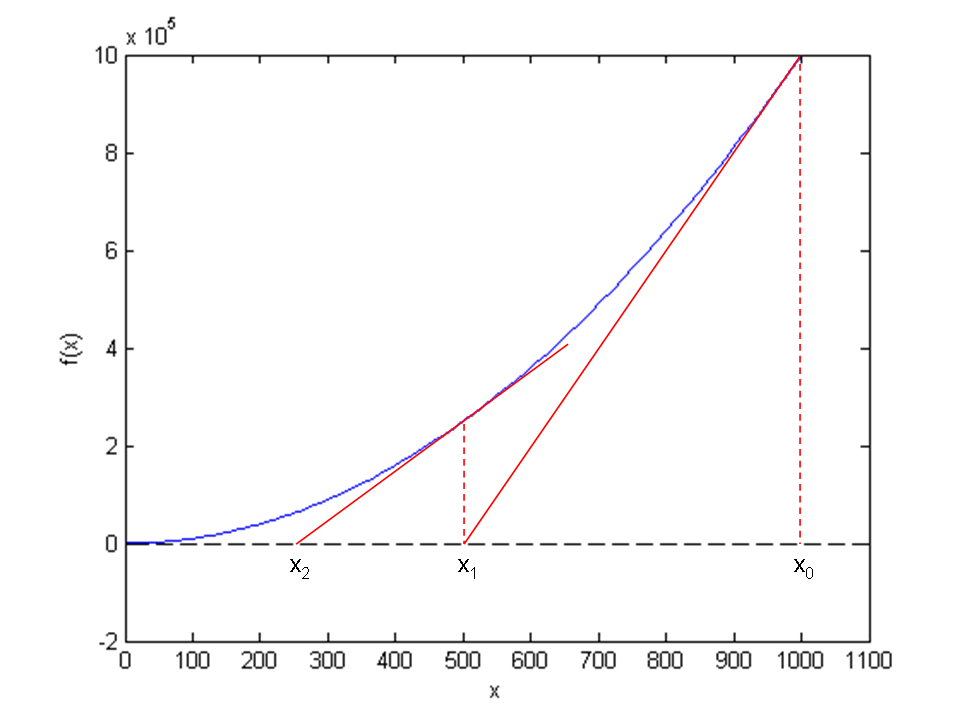

<p>Métodos de Newton</p>

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)},\quad n=0,1,2,\ldots$

In [ ]:
def Newton(f, dfdx, x, eps,n):
    k=0
    while abs(f(x)) > eps and k < n:
        k=k+1
        x = x - float(f(x))/dfdx(x)
        k+=1
    return x,k

In [ ]:
def f(x):
    return x**2 - 9

def dfdx(x):
    return 2*x

print(Newton(f, dfdx, 1000, 0.001,100))

(3.0000276392750296, 22)


<p>Métodos da secantes</p>

$x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n)-f(x_{n-1})}
\thinspace $

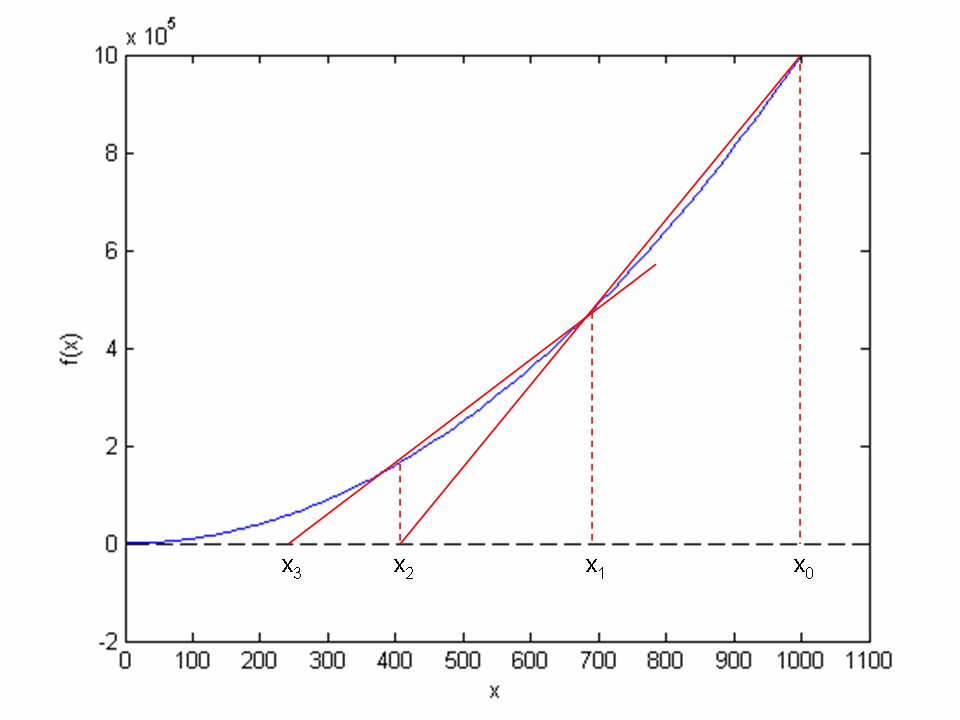

In [ ]:
def secant(f, x0, x1, eps):
    f_x0 = f(x0)
    f_x1 = f(x1)
    iteration_counter = 0
    while abs(f_x1) > eps and iteration_counter < 100:
        try:
            denominator = float(f_x1 - f_x0)/(x1 - x0)
            x = x1 - float(f_x1)/denominator
        except ZeroDivisionError:
            print("Error! - denominator zero for x = ", x) 
            sys.exit(1)     # Abort with error
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        iteration_counter += 1
    # Here, either a solution is found, or too many iterations
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x, iteration_counter

def f(x):
    return x**2 - 9

x0 = 1000;   x1 = x0 - 1

solution, no_iterations = secant(f, x0, x1, eps=1.0e-6)

if no_iterations > 0:    # Solution found
    print("Number of function calls: %d" % (2 + no_iterations))
    print("A solution is: %f" % (solution))
else:
    print("Solution not found!")

Number of function calls: 19
A solution is: 3.000000


In [ ]:
def bisection(f, x_L, x_R, eps,num):
    f_L = f(x_L)
    if f_L*f(x_R) > 0:
        print( "Error! Function does not have opposite signs at interval endpoints!")
        sys.exit(1)
    x_M = float(x_L + x_R)/2.0
    f_M = f(x_M)
    iteration_counter = 1


    while abs(f_M) > eps:
        if f_L*f_M > 0:   # i.e. same sign
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
        x_M = float(x_L + x_R)/2
        f_M = f(x_M)
        iteration_counter += 1

        if(iteration_counter>num):
          break

    return x_M, iteration_counter

def f(x):
    return x**2 - 9

a = 0;   b = 1000; total=200;eps=1.0e-6

solution, no_iterations = bisection(f, a, b,eps ,total)
print('solution=', solution, 'no_iterations=',no_iterations)

solution= 3.000000026077032 no_iterations= 31
